In [2]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/IFT6010 - Term Project - drive/final_26_april

/content/gdrive/.shortcut-targets-by-id/1IKlk_erOI-EoQtJXmIKHSifs7nNkoqJq/IFT6010 - Term Project - drive/final_26_april


In [4]:
!ls

class_event_story.py	    execution_preprocessing.py	main_run.ipynb
data			    execution_tf_idf_cosine.py	__pycache__
execution_keyword_graph.py  keyword_extractor.py	story_event_utils.py


# Installation

In [5]:
!python -m spacy download en_core_web_lg
!pip install sentence-transformers
!pip install gensim
!pip install networks
!pip install matplotlib
!pip install yake
!pip install editdistance==0.3.1
# !pip install editdistance==0.5.3
!pip install nltk


#Pip for the keywords graph

!pip install textgraphics
!pip install networkx
# !pip install networkx==2.4
!pip install python-louvain
!pip install cdlib
!pip install communities
!pip install icecream

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=08d252ad5760aaebe5004144c6b900cd1ceaea2241f36b29614c4eeba1ffafd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-bw1ba9un/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Import

In [6]:
import pandas as pd

import os.path
from os import path


# Import for preprocess + keywords part
from execution_preprocessing import do_preprocessing_for_news_articles
from execution_preprocessing import do_preprocessing_for_dsk_articles

# Import for keywords graph
from execution_keyword_graph import create_keyword_graph

# Import for the Tf-idf + cosine similarity + Topics
import pickle
from execution_tf_idf_cosine import tf_inverseDocumentFrequency
from execution_tf_idf_cosine import do_cosine_similarity
from execution_tf_idf_cosine import prepare_cluster_vector
from execution_tf_idf_cosine import set_document_topic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocess + Keywords

In [9]:
# If the preprocessed dataframes with keywords do not exist, create them. 
# !! WARNING: creating the dataframes can take days !!

#DSK 

if not path.exists('data/news_dsk_with_extracted_keywords_100_25april_vector.pkl'):
    dsk_dataframe = pd.read_csv("data/dsk_articles.csv")
    print(len(dsk_dataframe))
    dsk_dataframe=dsk_dataframe.iloc[:2]
    do_preprocessing_for_dsk_articles(dsk_dataframe,'data')

#News
if not path.exists('data/news_with_extracted_keywords_and_vectors.pkl'):
    news_dataframe = pd.read_csv("data/articles1.csv")
    print(len(news_dataframe))
    news_dataframe=news_dataframe.iloc[:2]
    do_preprocessing_for_news_articles(news_dataframe,'data')


dsk_dataframe= pd.read_pickle('data/news_dsk_with_extracted_keywords_100_25april_vector.pkl').drop_duplicates(["content"]).drop_duplicates(["title"])
news_dataframe= pd.read_pickle('data/news_with_extracted_keywords_and_vectors.pkl').drop_duplicates(["content"]).drop_duplicates(["title"])

dsk_dataframe = dsk_dataframe.rename(columns={'VECTOR': 'vector'})
del dsk_dataframe['summary']

del news_dataframe['publication']
del news_dataframe['author']
# del news_dataframe['year']
# del news_dataframe['month']

frames = [dsk_dataframe, news_dataframe]

total_news_dataset = pd.concat(frames)

# Get bigger dataset

In [7]:
#news_dataset = pd.read_pickle("news_with_extracted_keywords.pkl")
news_dataset_pt2 = pd.read_pickle("data/1k_5k_news_with_extracted_keywords.pkl")
news_dataset_pt3 = pd.read_pickle("data/25k_27k_news_with_extracted_keywords.pkl")

news_dataset_pt4 = pd.read_pickle("data/27k_29k_news_with_extracted_keywords.pkl")
news_dataset_pt5 = pd.read_pickle("data/29k_31k_news_with_extracted_keywords.pkl")
news_dataset_pt6 = pd.read_pickle("data/31k_33k_news_with_extracted_keywords.pkl")

news_dataset_pt7 = pd.read_pickle("data/33k_35k_news_with_extracted_keywords.pkl")
news_dataset_pt8 = pd.read_pickle("data/35k_37k_news_with_extracted_keywords.pkl")
news_dataset_pt9 = pd.read_pickle("data/37k_39k_news_with_extracted_keywords.pkl")


dsk_dataset = pd.read_pickle("data/news_dsk_with_extracted_keywords_5000_25april.pkl").drop_duplicates(["text"]).drop_duplicates(["title"]).iloc[0:2000]

frames = [news_dataset_pt2,news_dataset_pt3,news_dataset_pt4,news_dataset_pt5,news_dataset_pt6,news_dataset_pt7,news_dataset_pt8,news_dataset_pt9]

total_news_dataset = pd.concat(frames)

#dsk_dataframe = dsk_dataframe.rename(columns={'VECTOR': 'vector'})

dsk_dataset = dsk_dataset.rename(columns={'text': 'content'})
del dsk_dataset['summary']
del total_news_dataset['year']
del total_news_dataset['month']
del total_news_dataset['publication']
del total_news_dataset['author']

frames = [dsk_dataset, total_news_dataset]

total_news_dataset = pd.concat(frames)

In [30]:
total_news_dataset

,Unnamed: 0,title,content,date,text_and_title,preprocessed_text,extracted_keywords
0,0,Dominique Strauss-Kahn Sex-Crime Case: Accuser...,The New York Post has learned that the woman a...,2011-05-18 16:30:35,Dominique Strauss-Kahn Sex-Crime Case: Accuser...,dominiqu strausskahn sexcrim case accus live i...,"[strausskahn, live, dominiqu, woman, patient, ..."
1,1,Strauss-Kahn’s NY apartment plan falls apart,Strauss-Kahn’s NY apartment plan falls apart A...,2011-05-20 22:57:39,Strauss-Kahn’s NY apartment plan falls apart S...,strausskahn ny apart plan fall apart strausska...,"[strausskahn, plan, assault, charg, post, bail..."
2,2,Why is France Falling for <em>Strauss-Kahn</em...,"According to a worrying CSA poll, it seems tha...",2011-05-19 14:50:18,Why is France Falling for <em>Strauss-Kahn</em...,whi is franc fall for em strausskahn em conspi...,"[strausskahn, public, journalist, media, polit..."
3,3,Traces of Strauss-Kahn's DNA found on alleged ...,Traces of Strauss-Kahn's DNA found on alleged ...,2011-05-24 01:41:38,Traces of Strauss-Kahn's DNA found on alleged ...,trace of strausskahn 's dna found on alleg vic...,"[strausskahn, trace, dna, found, size, comment..."
4,4,Dominique Strauss-Kahn Resigns as IMF Chief,"Sajwert houseparty, usually I try not to answe...",2011-05-19 18:26:13,Dominique Strauss-Kahn Resigns as IMF Chief Sa...,dominiqu strausskahn resign as imf chief sajwe...,"[repli, permalink, flag, peopl, money, imf, ba..."
...,...,...,...,...,...,...,...
39051,40456,Thailand: Time is ’appropriate’ for Crown Prin...,Bangkok (CNN) Thailand’s parliament says now i...,2016-11-29,Thailand: Time is ’appropriate’ for Crown Prin...,thailand time is appropri for crown princ to b...,"[princ, throne, time, vajiralongkorn, death, m..."
39052,40457,Chattanooga bus crash: About the driver,(CNN) Johnthony Walker drove a school bus pac...,2016-11-29,Chattanooga bus crash: About the driver (CNN)...,chattanooga bus crash about the driver cnn joh...,"[bus, student, school, driver, children, accid..."
39053,40458,Investigators: Ohio State attacker inspired by...,(CNN) Authorities believe the Ohio State Univ...,2016-11-29,Investigators: Ohio State attacker inspired by...,investig ohio state attack inspir by isi cnn a...,"[state, campus, attack, car, student, post, sa..."
39054,40460,What challenges are facing Pakistan’s new army...,"Islamabad, Pakistan (CNN) Pakistan has named a...",2016-11-28,What challenges are facing Pakistan’s new army...,what challeng are face pakistan new armi chief...,"[countri, bajwa, india, militari, kashmir, sha..."


# Keywords Graph

  5%|▌         | 58/1100 [00:00<00:01, 575.97it/s]

['strausskahn', 'public', 'journalist', 'media', 'politician', 'mitterrand', 'press', 'explain', 'mani', 'news', 'staff', 'conspiraci', 'discov', 'tweet', 'frenchman', 'death', 'scandal', 'chambermaid', 'brothel', 'corrupt', 'america', 'tristan', 'possibl', 'everi polit', 'omerta', 'doe', 'belgian tv channel', 'ani dissent point', 'isn']


100%|██████████| 1100/1100 [00:09<00:00, 113.29it/s]


['strausskahn', 'live', 'dominiqu', 'woman', 'patient', 'apart', 'send', 'monetari', 'island', 'bronx', 'facebook', 'maid', 'hivposit', 'hivaid', 'the new york post', 'harlem commun', 'medic', 'suicid watch', 'plan', 'assault', 'charg', 'post', 'bail', 'report', 'yesterday', 'said', 'arm', 'politician', 'tabloid', 'june', 'convict', 'resign', 'chambermaid', 'lawyer', 'imprison', 'rape', 'manhattan', 'imf', 'alleg sexu', 'sofitel', 'the intern monetari fund', 'public', 'journalist', 'media', 'press', 'mani', 'news', 'staff', 'conspiraci', 'discov', 'tweet', 'frenchman', 'death', 'scandal', 'brothel', 'corrupt', 'america', 'tristan', 'possibl', 'doe', 'isn', 'dna', 'found', 'size', 'comment', 'alleg', 'cloth', 'victim', 'print', 'wall', 'elizabeth', 'exhum', 'arrest', 'wife', 'nbc', 'japan', 'chile', 'missouri', 'uk', 'peru', 'spain', 'peopl', 'money', 'banker', 'tri', 'socialist', 'goodbi', 'learn', 'themselv', 'french', 'absolut', 'greec', 'dictat', 'minist', 'head', 'board', 'night', 

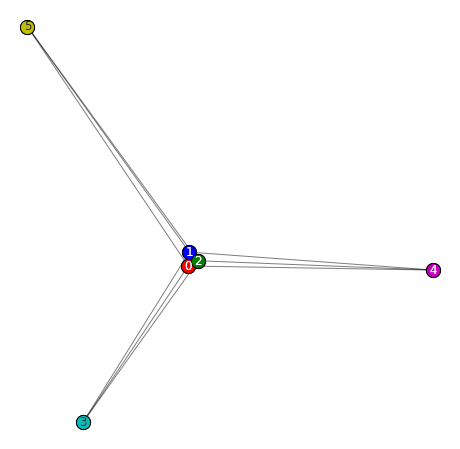

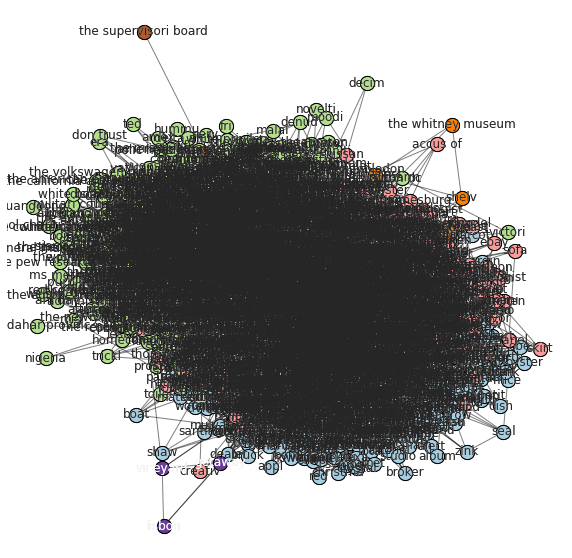

In [13]:
create_keyword_graph(total_news_dataset,'data')

# Make TF-IDF of each documents

In [ ]:
# corpus=total_news_dataset['extracted_keywords']
# corpus=corpus.to_list()

# total_news_dataset['VECTOR'] = total_news_dataset['extracted_keywords'].apply(tf_inverseDocumentFrequency,allDocs=corpus)

# Do cosine similarity

In [ ]:
# #Cosine similarity between documents of the corpus

# dict_tfdif = {}

# i=8
# for j in range(len(total_news_dataset)):
#     dict_tfdif[f"{i}_{j}"] = do_cosine_similarity(total_news_dataset.iloc[i]["VECTOR"], total_news_dataset.iloc[j]["VECTOR"])

In [ ]:
temp_defaultdict_communities = pickle.load(open("data/extracted_communities.pickle",'rb'))
dict_communities = {}
for i,v in temp_defaultdict_communities.items():
    if len(v)==1:
        dict_communities[i] = v[0]

keywords_clusters = pd.DataFrame(dict_communities.items())
keywords_clusters.columns = ['keyword', 'cluster']

len(keywords_clusters)

dict_communities = {}
for i,v in keywords_clusters.items():
    if len(v)==1:
        dict_communities[i] = v[0]

clusters_vector = prepare_cluster_vector(keywords_clusters, 0)

len(clusters_vector[0])

1214

In [ ]:
total_news_dataset['TOPIC'] = total_news_dataset['vector'].apply(set_document_topic, all_cluster_vector=clusters_vector)

In [ ]:
total_news_dataset.to_pickle("data/1k_100_news_dsk_with_extracted_keywords_vector_topic.pkl")

# For each topics, create events and stories

In [ ]:
total_news_dataset[total_news_dataset['TOPIC']=='']

,Unnamed: 0,title,content,date,text_and_title,preprocessed_text,extracted_keywords,vector,TOPIC
69,69,BOE Releases Inflation Letter,Scalping: is risk worth big income? Forex news...,2011-05-17 20:45:38,BOE Releases Inflation Letter Scalping: is ris...,boe releas inflat letter scalp is risk worth b...,"[scalp, strategi, stock, market, peculiar, com...","{'scalp': 0, 'strategi': 0, 'stock': 0, 'marke...",
71,71,Nina In New York: This Place Is A Zoo,(Alligator (credit: AP Photo/Wilfredo Lee)) Al...,2011-05-19 14:56:48,Nina In New York: This Place Is A Zoo (Alligat...,nina in new york this place is zoo allig credi...,"[zoo, twitter, cours, citi, nina, escap, credi...","{'zoo': 0, 'twitter': 0, 'cours': 0, 'citi': 0...",


In [8]:
from class_event_story import Event,Story
from story_event_utils import is_event_in_story

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
news_dataset = total_news_dataset
list_of_stories = []

# Go through events to add to stories 
for i in range(len(news_dataset)):

    if i%500 == 0:
        print(i)

    row = news_dataset.iloc[i]
    title    = row["title"]
    content  = row["content"]
    keywords = row["extracted_keywords"]
    date     = row["date"]
    #vector   = row["vector"]
    vector   = [0,0,0]

    new_event = Event(title, content, keywords, date, vector)

    # We create the first story
    if i==0:
        list_of_stories.append(Story(new_event))

    # Do we add the event to an existing story, or create a new one ?
    else:

        found_a_story_for_event = False
        max_similarity = 0

        # Iterate through the story to associate an event to a story
        for index, story in enumerate(list_of_stories):
            # if the event is the story, we append it to the story
            similarity, event_in_story = is_event_in_story(keywords, title, story)

            if event_in_story:
                if similarity>max_similarity:
                    max_similarity = similarity
                    story_index = index
                found_a_story_for_event = True

        if found_a_story_for_event:
            list_of_stories[story_index].add_event(new_event)

        # If we found no story to associate the event, we create a new story
        if not found_a_story_for_event:
            list_of_stories.append(Story(new_event))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [ ]:
for story in list_of_stories:
    events = story.get_list_of_events()
    if(len(events) > 2):
        for event in events:
            print(event.get_title())
            print(event.date)
print("=======================================")

In [ ]:
# all_topics= total_news_dataset['TOPIC'].unique()

# dict_for_all_topics={}

# for i in all_topics:

#   print('TOPICS '+ str(i))
#   news_dataset = total_news_dataset[total_news_dataset['TOPIC'] == i ]
#   list_of_stories = []

#     # Go through events to add to stories 
#   for i in range(len(news_dataset)):
        
#     if i%100 == 0:
#         print(i)

#     row = news_dataset.iloc[i]
#     title    = row["title"]
#     content  = row["content"]
#     keywords = row["extracted_keywords"]
#     date     = row["date"]
#     #vector   = row["vector"]
#     vector   = [0,0,0]

#     new_event = Event(title, content, keywords, date, vector)

#     # We create the first story
#     if i==0:
#         list_of_stories.append(Story(new_event))

#     # Do we add the event to an existing story, or create a new one ?
#     else:
#         found_a_story_for_event = False
#         # Iterate through the story to associate an event to a story
#         for story in list_of_stories:
#             # if the event is the story, we append it to the story
#             if is_event_in_story(keywords, title, story):
#                 found_a_story_for_event = True
#                 story.add_event(new_event)
#                 break

#         # If we found no story to associate the event, we create a new story
#         if not found_a_story_for_event:
#             list_of_stories.append(Story(new_event))

#   dict_for_all_topics[str(i)] = list_of_stories

#   print(len(list_of_stories))

#   for story in list_of_stories:
#       events = story.get_list_of_events()
#       if(len(events) > 2):
#           for event in events:
#               print(event.get_title())
#           print("=======================================")

#   print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

TOPICS 0
0
100
200
300
400
500
600
700
800
900
969
Senate Republicans Open Fight Over Obama Health Law - The New York Times
Republicans’ 4-Step Plan to Repeal the Affordable Care Act - The New York Times
Senators Propose Giving States Option to Keep Affordable Care Act - The New York Times
Senate Confirmation Hearings to Begin Without All Background Checks - The New York Times
G.O.P. Senators Hope to Speed Trump Cabinet Confirmations - The New York Times
Mike Pompeo Is Confirmed to Lead C.I.A., as Rex Tillerson Advances - The New York Times
Trump Orders Mexican Border Wall to Be Built and Plans to Block Syrian Refugees - The New York Times
Donations to A.C.L.U. and Other Organizations Surge After Trump’s Order - The New York Times
Trump Clashes Early With Courts, Portending Years of Legal Battles - The New York Times
What to Watch in Congress: Confirmation Votes, Regulation Rollbacks - The New York Times
Jeff Sessions Confirmed as Attorney General, Capping Bitter Battle - The New York 

## Check

In [ ]:
clusters_vector[1]

{'watersh': 1,
 'affili': 1,
 'the': 1,
 'london': 1,
 'school': 1,
 'of': 1,
 'econom': 1,
 'doe': 1,
 'kyrgyzstan': 1,
 'conscienti': 1,
 'falcon': 1,
 'methan': 1,
 'columbu': 1,
 'boundari': 1,
 'ankara': 1,
 'honorari': 1,
 'urg': 1,
 'mac': 1,
 'harvard': 1,
 'medic': 1,
 'moscow': 1,
 'whoop': 1,
 'chicago': 1,
 'polic': 1,
 'depart': 1,
 'poi': 1,
 'orang': 1,
 'brazen': 1,
 'intern': 1,
 'monetari': 1,
 'fund': 1,
 "'": 1,
 'cleveland': 1,
 'clin': 1,
 'tanzania': 1,
 'sochi': 1,
 'frankfurt': 1,
 'michigan': 1,
 'mani': 1,
 'chin': 1,
 'compani': 1,
 'recogn': 1,
 'south': 1,
 'dakota': 1,
 'midcenturi': 1,
 'luckili': 1,
 'centuri': 1,
 'employ': 1,
 'educ': 1,
 'busi': 1,
 'famili': 1,
 'relat': 1,
 'golden': 1,
 'glob': 1,
 'misl': 1,
 'disclos': 1,
 'pay': 1,
 'funni': 1,
 'abc': 1,
 'new': 1,
 'inclin': 1,
 'lynch': 1,
 'washington': 1,
 'post': 1,
 'tv': 1,
 'inflat': 1,
 'anonym': 1,
 'sierra': 1,
 'club': 1,
 'white': 1,
 'hous': 1,
 'advi': 1,
 'juli': 1,
 'egypt': 1

In [ ]:
total_news_dataset.head()

,Unnamed: 0,title,content,date,text_and_title,preprocessed_text,extracted_keywords,vector,TOPIC
0,0,Dominique Strauss-Kahn Sex-Crime Case: Accuser...,The New York Post has learned that the woman a...,2011-05-18 16:30:35,Dominique Strauss-Kahn Sex-Crime Case: Accuser...,dominiqu strausskahn sexcrim case accus live i...,"[strausskahn, live, dominiqu, woman, patient, ...","{'strausskahn': 0.013112947701654174, 'live': ...",0
1,1,Strauss-Kahn’s NY apartment plan falls apart,Strauss-Kahn’s NY apartment plan falls apart A...,2011-05-20 22:57:39,Strauss-Kahn’s NY apartment plan falls apart S...,strausskahn ny apart plan fall apart strausska...,"[strausskahn, plan, assault, charg, post, bail...","{'strausskahn': 0.01049035816132334, 'plan': 0...",0
2,2,Why is France Falling for <em>Strauss-Kahn</em...,"According to a worrying CSA poll, it seems tha...",2011-05-19 14:50:18,Why is France Falling for <em>Strauss-Kahn</em...,whi is franc fall for em strausskahn em conspi...,"[strausskahn, public, journalist, media, polit...","{'strausskahn': 0.010852094649644834, 'public'...",0
3,3,Traces of Strauss-Kahn's DNA found on alleged ...,Traces of Strauss-Kahn's DNA found on alleged ...,2011-05-24 01:41:38,Traces of Strauss-Kahn's DNA found on alleged ...,trace of strausskahn 's dna found on alleg vic...,"[strausskahn, trace, dna, found, size, comment...","{'strausskahn': 0.01049035816132334, 'trace': ...",2
4,4,Dominique Strauss-Kahn Resigns as IMF Chief,"Sajwert houseparty, usually I try not to answe...",2011-05-19 18:26:13,Dominique Strauss-Kahn Resigns as IMF Chief Sa...,dominiqu strausskahn resign as imf chief sajwe...,"[repli, permalink, flag, peopl, money, imf, ba...","{'repli': 0, 'permalink': 0, 'flag': 0, 'peopl...",0


In [ ]:
# count_dsk= 0 
# count_not_dsk=0
# for k,v in enumerate(total_news_dataset['TOPIC']):
#     if k >300:
#       # print('documents '+ str(k)+ ' --> '+str(v)) 
#       if v == 0 :
#           count_dsk+=1
#     else:
#       if v == 0 :
#           count_not_dsk+=1

# print(count_dsk)
# print(count_not_dsk)